In [67]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Load the diabetes dataset

In [68]:
diabetes = load_diabetes(as_frame=True, scaled=True)

# Split the dataset into training and testing sets

In [69]:
x=diabetes.data

In [70]:
x.shape

(442, 10)

In [71]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [72]:
y=diabetes.target

In [73]:
y.shape

(442,)

In [74]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


# Multivariate linear regression

In [76]:
linear_regression = LinearRegression()



In [77]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [78]:
pred_1=linear_regression.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score

In [82]:
pred_1.shape

(89,)

# Multivariate polynomial regression of the 2nd degree

In [98]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [99]:
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

In [100]:
poly_regression = LinearRegression()

In [101]:
poly_regression.fit(X_train_poly, y_train)

LinearRegression()

In [105]:
pred_2=poly_regression.predict(X_test_poly)

# Compare models using MAE and MAPE

In [107]:
 # Calculate MAE
mae1 = mean_absolute_error(y_test,pred_1)
mae2 = mean_absolute_error(y_test, pred_2)

In [111]:
print("Multivariate Linear MAE",mae1)
print("Multivariate Ploynomial MAE",mae2)

Multivariate Linear MAE 42.79409467959994
Multivariate Ploynomial MAE 43.5816932546521


In [112]:

     # Calculate MAPE
mape1 = mean_absolute_percentage_error(y_test,pred_1)
mape2 = mean_absolute_percentage_error(y_test, pred_2)
   

print("Multivariate Linaer MAPE",mape1)
print("Multivariate Ploynomial MAPE",mape2)








Multivariate Linaer MAPE 0.3749982636756113
Multivariate Ploynomial MAPE 0.3828567851400108


# Plotting 

In [114]:
import matplotlib.pyplot as plt

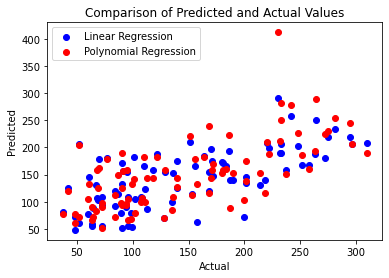

In [115]:
def plot_predictions(y_test, linear_pred, poly_pred):
    plt.scatter(y_test, linear_pred, color='b', label='Linear Regression')
    plt.scatter(y_test, poly_pred, color='r', label='Polynomial Regression')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Comparison of Predicted and Actual Values')
    plt.legend()
    plt.show()

plot_predictions(y_test, pred_1, pred_2)